# Census Income - Proyect with Random Forest (Modelo 2)

> Usamos 'Grid-Search' para buscar los mejores hiperparametros para el modelo de acuerdo a los datos con los que contamos

Variables del conjunto de datos "Census Income" de UCI. Este conjunto de datos se utiliza comúnmente para tareas de clasificación, como predecir si una persona gana más o menos de $50,000 al año, en base a sus características. Las caracteristicas son:

1. **age** (edad): La edad de la persona en años.
2. **workclass** (tipo de trabajo): Clasificación del tipo de empleo (e.g., asalariado, autónomo, gobierno).
3. **fnlwgt** (ponderación final): Peso final calculado para las muestras en la encuesta, representa el número de personas que una fila puede representar.
4. **education** (educación): Nivel educativo alcanzado (e.g., escuela secundaria, licenciatura).
5. **education-num** (número de años de educación): Número de años de educación recibidos.
6. **marital-status** (estado civil): Estado civil de la persona (e.g., casado, soltero).
7. **occupation** (ocupación): Tipo de ocupación o profesión de la persona.
8. **relationship** (relación): Relación de la persona con el jefe de familia (e.g., esposo, esposa, hijo).
9. **race** (raza): Clasificación racial de la persona (e.g., blanca, negra, asiática).
10. **sex** (sexo): Sexo de la persona (masculino o femenino).
11. **capital-gain** (ganancia de capital): Ganancias de capital obtenidas por inversiones.
12. **capital-loss** (pérdida de capital): Pérdidas de capital incurridas.
13. **hours-per-week** (horas por semana): Número de horas trabajadas por semana.
14. **native-country** (país de origen): País de nacimiento de la persona.
15. **income** (ingreso): Ingreso anual, clasificado en ">50K" o "<=50K", indicando si la persona gana más o menos de $50,000 al año.



In [1]:
import pandas as pd

# Cargar el archivo de datos principal 'adult.data'
data_path = './adult.data'
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
                'marital_status', 'occupation', 'relationship', 'race', 
                'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 
                'native_country', 'income']

# Cargar el dataset en un DataFrame
df = pd.read_csv(data_path, header=None, names=column_names, engine='python')

# Mostrar las primeras filas
df.head(2)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [2]:
# Columnas categoricas 
col_categoris = [col for col in df.columns if df[col].dtype == 'object']

# split train - test

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

X = df.drop(['income','native_country','race'], axis=1)
y = df['income']

ord_enc = OrdinalEncoder()
X = pd.DataFrame(ord_enc.fit_transform(X), columns=X.columns)

# GridSearchCV

In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

rf = RandomForestClassifier(random_state=42)


In [4]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [20, 25,  30],
    'min_samples_split': [2, 5],
    'max_features': [3,5,7,'sqrt'],  #" Agregadpo"
    'min_samples_leaf': [4, 6, 8],

}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(x_train, y_train)


Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30],
                         'max_features': [3, 5, 7, 'sqrt'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [9]:

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

best_rf = grid_search.best_estimator_

# Predicciones en el conjunto de prueba
y_pred = best_rf.predict(x_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión en el conjunto de prueba:", accuracy)

Mejores parámetros: {'max_depth': 20, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Mejor puntuación de validación cruzada: 0.8630658701177735
Precisión en el conjunto de prueba: 0.8648786979219981


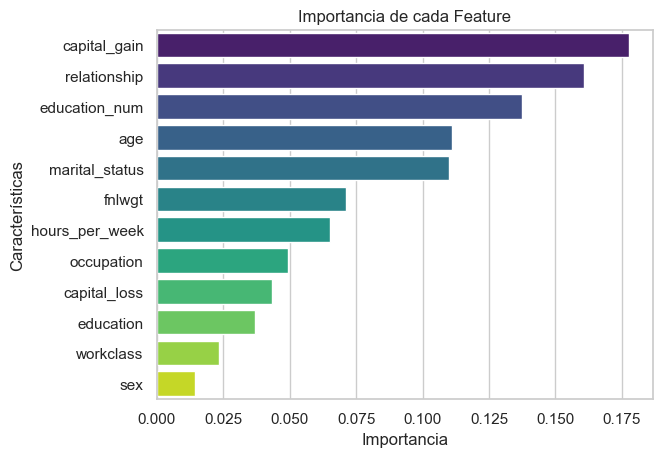

In [10]:
from tools_ml.eval_tree import tree_important_features
best_rf.feature_importances_
tree_important_features(best_rf, X.columns)

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[7024,  423],
       [ 897, 1425]], dtype=int64)

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      7447
        >50K       0.77      0.61      0.68      2322

    accuracy                           0.86      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



In [14]:
y_pred_originals = best_rf.predict(X)
print(classification_report(y, y_pred_originals))

              precision    recall  f1-score   support

       <=50K       0.90      0.96      0.93     24720
        >50K       0.84      0.68      0.75      7841

    accuracy                           0.89     32561
   macro avg       0.87      0.82      0.84     32561
weighted avg       0.89      0.89      0.89     32561



In [15]:
confusion_matrix(y, y_pred_originals)

array([[23701,  1019],
       [ 2510,  5331]], dtype=int64)

**CONCLUSIONES***
- Al ser un modelo desbalanceado podemos visualizar como la clase menos dominante tiene problemas para perfomar. 
- En general se puede pensar que el modelo esta desempeñamdose bien, pero no podemos guiarnos solo por el valor del accuracy para estos casos. 
- En modelos posteriores se buscara abordar el tema del desbalance